In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
plt.style.use('dark_background')

In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"

In [3]:
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)
snapshots_analysis = [523,525, 527,530,532,535, 537,539,541,
 543, 545,547, 550, 553, 555,557, 560, 563, 565, 567,570,573, 575, 577, 580,
 583, 585,587,590, 592,594,596,598,600,
 602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
 629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
 664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
 690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
 718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
 755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
 782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
 853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937,
 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996]

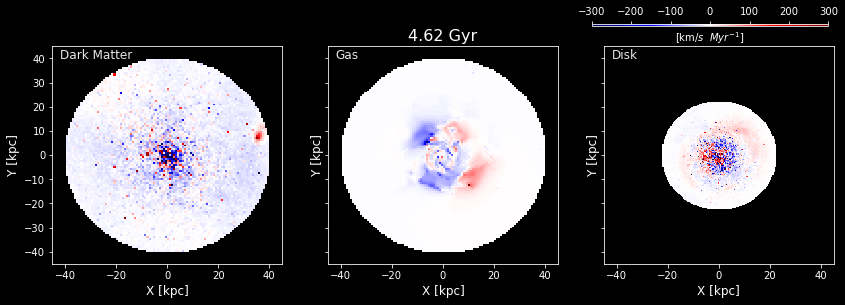

In [5]:


    name = 704
    lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40.csv")
    mesh_gas = pd.read_csv(path_acceleration + f"mesh_aceleracion_gas_{name}_ytRS_40.csv")
    mesh_disk = pd.read_csv(path_acceleration + f"mesh_aceleracion_stars_disk_{name}_ytRS_22.csv")
    rango=300
    size = 5
    ancho = 45
    seconds_to_Myr = 3.15576e+16
    fig, ax = plt.subplots(1, 3, sharex=False, sharey=True,figsize = (14,4))
    az = ax[0].scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az*seconds_to_Myr, 
                cmap= "seismic", s = size, vmin =-rango, vmax = rango)

 #   plt.title(f"{lb:.2f} Gyr", fontsize = 18)

    ar = ax[1].scatter(mesh_gas.X, mesh_gas.Y, marker='s', c=mesh_gas.az*seconds_to_Myr, cmap= "seismic", s =size, vmin =-rango, vmax =rango)

 
    aphi = ax[2].scatter(mesh_disk.X, mesh_disk.Y, marker='s', c=mesh_disk.az*seconds_to_Myr, cmap= "seismic", s = size,vmin =-rango, vmax = rango)
    ax[1].set_title (f"{lb:0.2f} Gyr", fontsize = 16)


    for k in range(3):
        ax[k].set_xlabel("X [kpc]",fontsize = 12)
        ax[k].set_ylabel("Y [kpc]",fontsize = 12)
        ax[k].set_xlim(-ancho,ancho)
        ax[k].set_ylim(-ancho,ancho)
        
    ax[0].text(-42, 40, "Dark Matter", fontsize = 12, alpha = 0.9)
    ax[1].text(-42, 40, "Gas", fontsize = 12, alpha = 0.9)
    ax[2].text(-42, 40, "Disk", fontsize = 12, alpha = 0.9)
    cbar_ax_ar = fig.add_axes([0.66, 0.95, 0.235, 0.008])
    cbar_ar  = fig.colorbar(az, cax=cbar_ax_ar , orientation = "horizontal", label=  "[km/$s$  $Myr^{-1}$]")          
    cbar_ar.ax.tick_params(labelsize= 10, top= True,bottom= False,
               labeltop=True,  labelbottom= False)

 #   plt.subplots_adjust( wspace=0.5, hspace = 0.3)
    plt.show()
   # plt.savefig(f"acceleration_figs/{name}.png", bbox_inches='tight', dpi = 100)

In [19]:
mesh_dm.az*seconds_to_Myr

0       -3.730783
1       -0.258986
2       -0.826678
3       -4.433164
4       -4.823946
          ...    
7663   -24.035955
7664   -23.502591
7665   -18.642064
7666     4.540321
7667   -16.952356
Name: az, Length: 7668, dtype: float64